## Quantum Architecture Analysis  

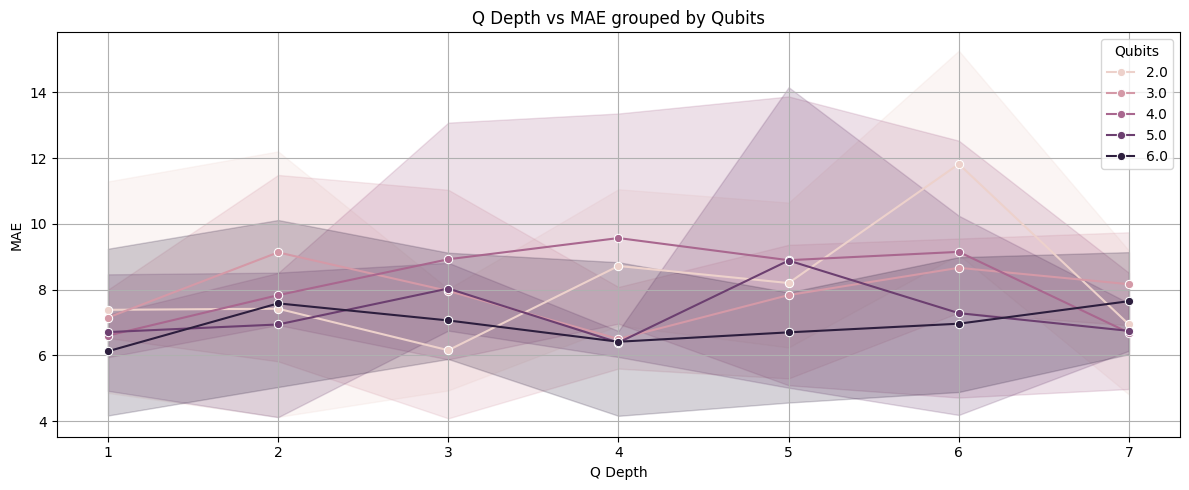

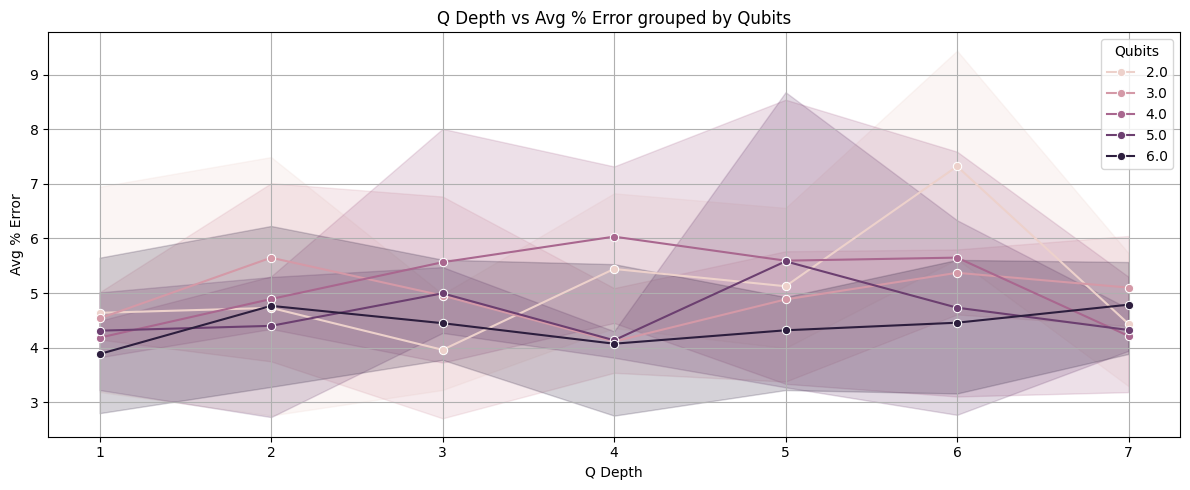

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel data (replace this path with your actual Excel file path if needed)
file_path = "./qml_experiment_log - Copy.xlsx"

# Load the data
df = pd.read_excel(file_path)

# Convert "-" to NaN and cast columns to numeric
for col in ["Qubits", "Q Depth", "Rotation Params", "MAE", "Avg % Error"]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Filter to only rows where quantum was used
df_quantum = df[df["Use Quantum"] == True]

# Create plots to visualize trends
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_quantum, x="Q Depth", y="MAE", hue="Qubits", marker="o")
plt.title("Q Depth vs MAE grouped by Qubits")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
sns.lineplot(data=df_quantum, x="Q Depth", y="Avg % Error", hue="Qubits", marker="o")
plt.title("Q Depth vs Avg % Error grouped by Qubits")
plt.grid(True)
plt.tight_layout()
plt.show()


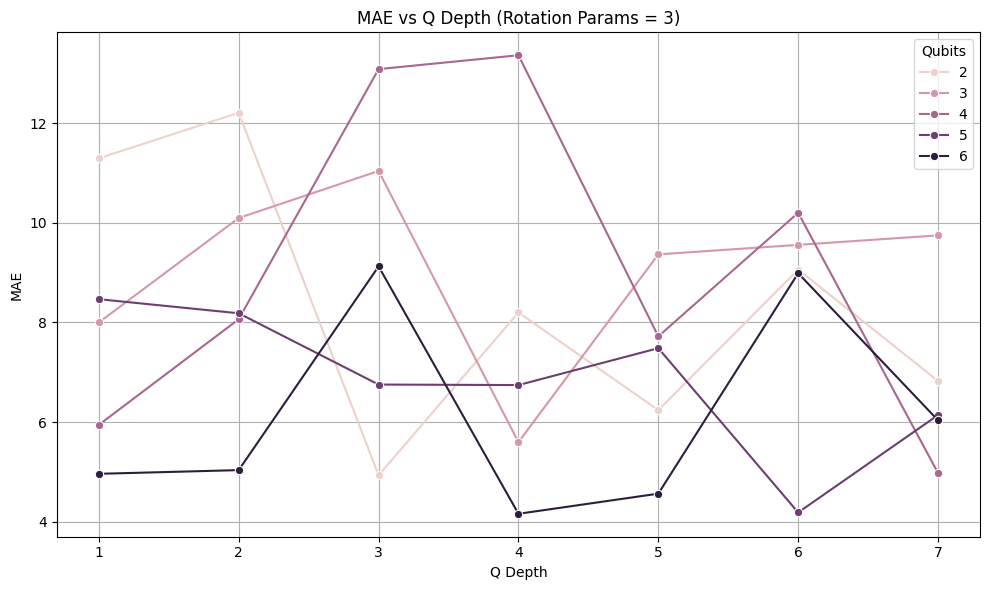

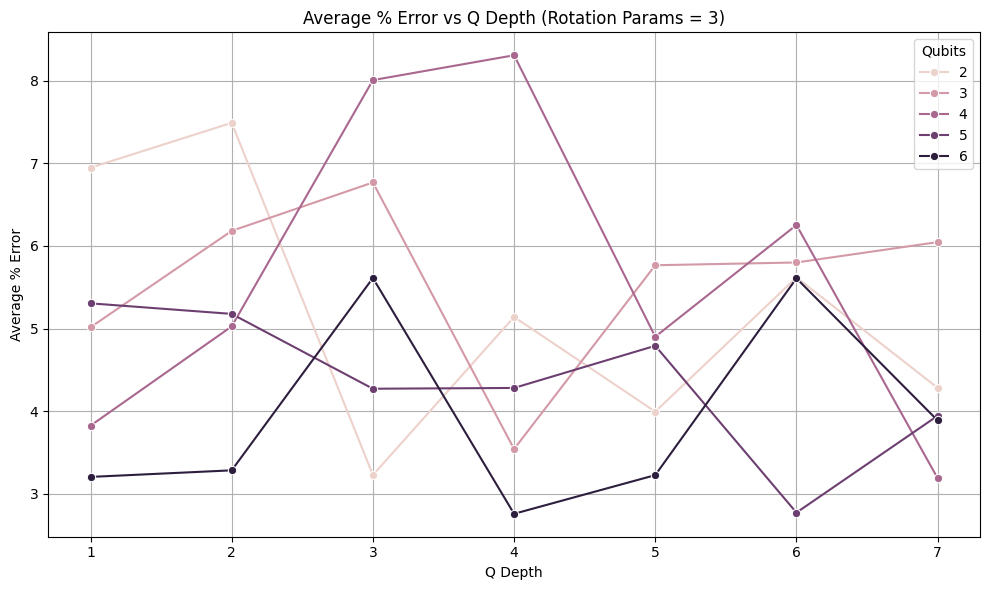

In [2]:


# Filter only rows where Rotation Params == 3
df_filtered = df[df["Rotation Params"] == 3]

# Drop rows with missing or invalid Qubits or Q Depth
df_filtered = df_filtered[(df_filtered["Qubits"] != "-") & (df_filtered["Q Depth"] != "-")]
df_filtered["Qubits"] = df_filtered["Qubits"].astype(int)
df_filtered["Q Depth"] = df_filtered["Q Depth"].astype(int)

# Plot MAE vs Q Depth for each Qubit value
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_filtered, x="Q Depth", y="MAE", hue="Qubits", marker="o")
plt.title("MAE vs Q Depth (Rotation Params = 3)")
plt.xlabel("Q Depth")
plt.ylabel("MAE")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Avg % Error vs Q Depth for each Qubit value
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_filtered, x="Q Depth", y="Avg % Error", hue="Qubits", marker="o")
plt.title("Average % Error vs Q Depth (Rotation Params = 3)")
plt.xlabel("Q Depth")
plt.ylabel("Average % Error")
plt.grid(True)
plt.tight_layout()
plt.show()


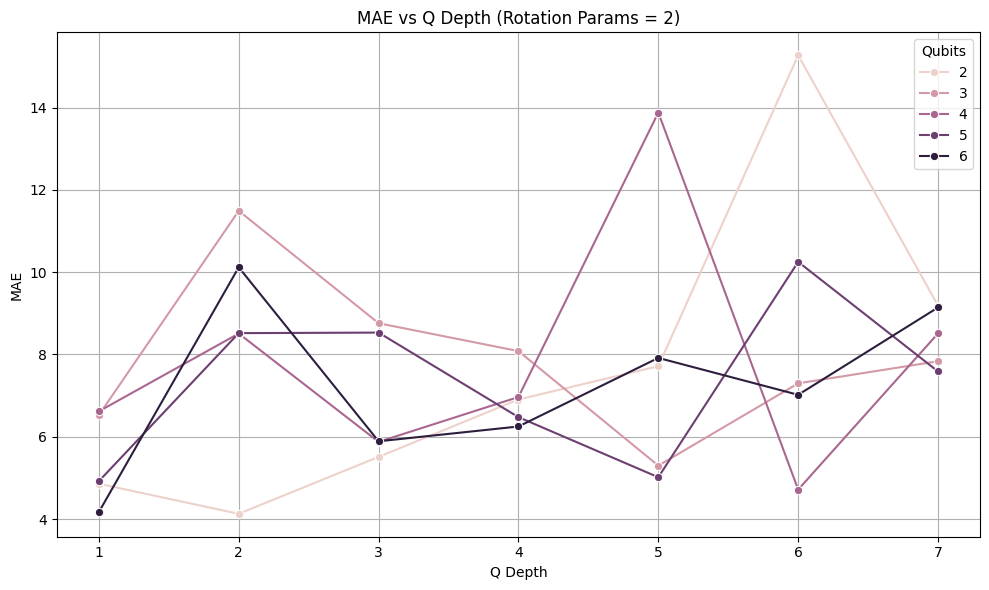

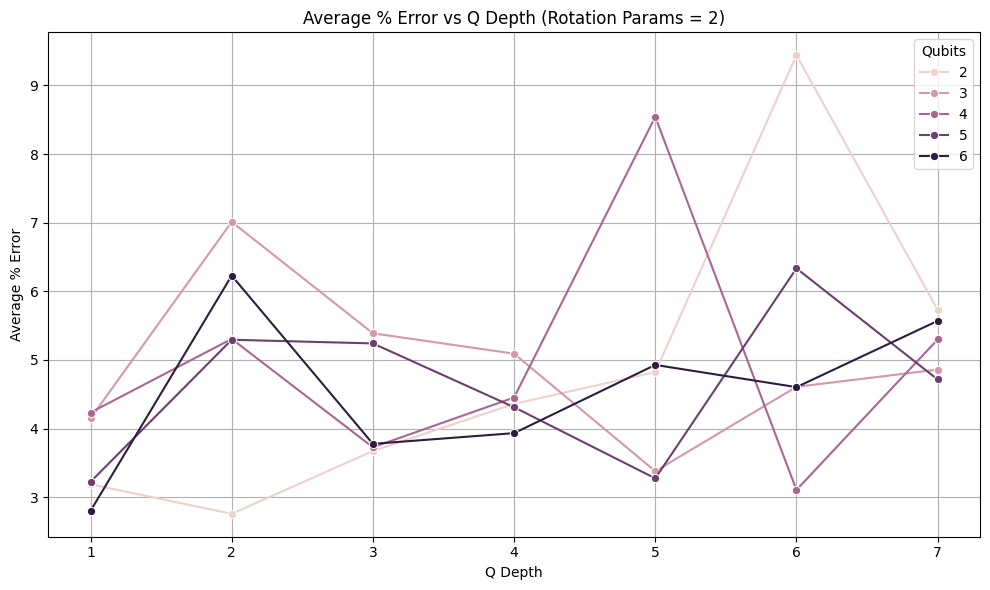

In [3]:


# Filter only rows where Rotation Params == 3
df_filtered = df[df["Rotation Params"] == 2]

# Drop rows with missing or invalid Qubits or Q Depth
df_filtered = df_filtered[(df_filtered["Qubits"] != "-") & (df_filtered["Q Depth"] != "-")]
df_filtered["Qubits"] = df_filtered["Qubits"].astype(int)
df_filtered["Q Depth"] = df_filtered["Q Depth"].astype(int)

# Plot MAE vs Q Depth for each Qubit value
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_filtered, x="Q Depth", y="MAE", hue="Qubits", marker="o")
plt.title("MAE vs Q Depth (Rotation Params = 2)")
plt.xlabel("Q Depth")
plt.ylabel("MAE")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Avg % Error vs Q Depth for each Qubit value
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_filtered, x="Q Depth", y="Avg % Error", hue="Qubits", marker="o")
plt.title("Average % Error vs Q Depth (Rotation Params = 2)")
plt.xlabel("Q Depth")
plt.ylabel("Average % Error")
plt.grid(True)
plt.tight_layout()
plt.show()


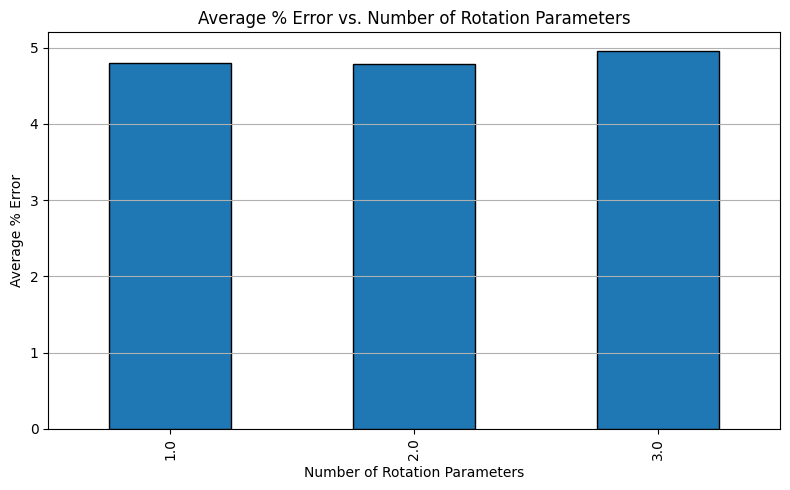

In [4]:

# Ensure numeric fields are correctly typed
df["Rotation Params"] = pd.to_numeric(df["Rotation Params"], errors="coerce")
df["Avg % Error"] = pd.to_numeric(df["Avg % Error"], errors="coerce")

# Group by n_rot_params and compute average of Avg % Error
avg_error_by_rot = df.groupby("Rotation Params")["Avg % Error"].mean().dropna()

# Plotting
plt.figure(figsize=(8, 5))
avg_error_by_rot.plot(kind="bar", edgecolor="black")
plt.title("Average % Error vs. Number of Rotation Parameters")
plt.xlabel("Number of Rotation Parameters")
plt.ylabel("Average % Error")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


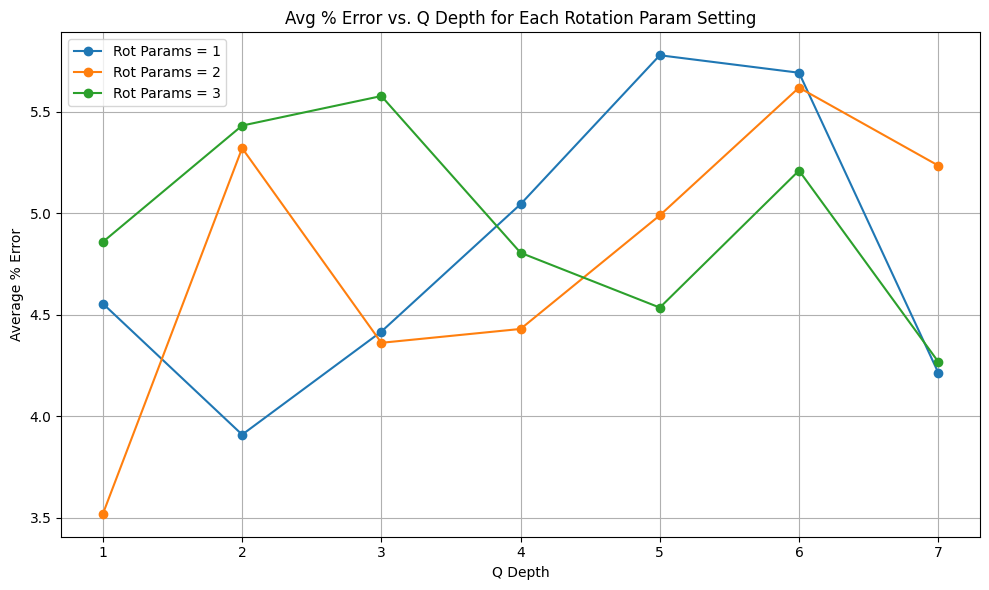

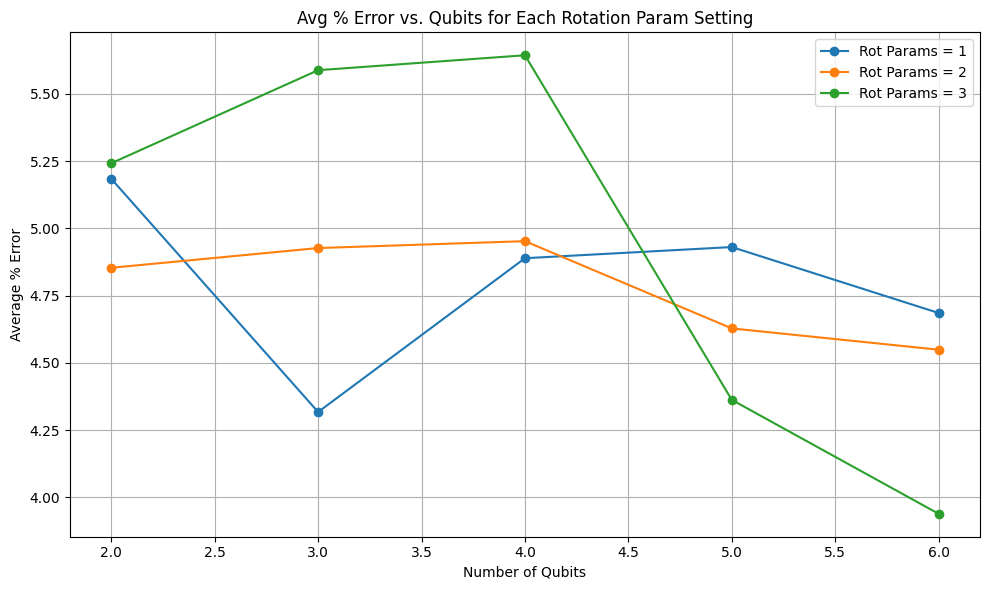

In [5]:

# Ensure columns are numeric where needed
df["Rotation Params"] = pd.to_numeric(df["Rotation Params"], errors="coerce")
df["Q Depth"] = pd.to_numeric(df["Q Depth"], errors="coerce")
df["Qubits"] = pd.to_numeric(df["Qubits"], errors="coerce")
df["Avg % Error"] = pd.to_numeric(df["Avg % Error"], errors="coerce")

# Drop rows with NaNs in critical fields
df_clean = df.dropna(subset=["Rotation Params", "Q Depth", "Qubits", "Avg % Error"])

# === Group and analyze ===

# Group 1: Avg % Error by Rotation Params and Q Depth
grouped_by_depth = df_clean.groupby(["Rotation Params", "Q Depth"])["Avg % Error"].mean().reset_index()

# Group 2: Avg % Error by Rotation Params and Qubits
grouped_by_qubits = df_clean.groupby(["Rotation Params", "Qubits"])["Avg % Error"].mean().reset_index()

# === Plot 1: Line plot for Q Depth ===
plt.figure(figsize=(10, 6))
for rot in sorted(grouped_by_depth["Rotation Params"].unique()):
    sub_df = grouped_by_depth[grouped_by_depth["Rotation Params"] == rot]
    plt.plot(sub_df["Q Depth"], sub_df["Avg % Error"], marker="o", label=f"Rot Params = {int(rot)}")
plt.title("Avg % Error vs. Q Depth for Each Rotation Param Setting")
plt.xlabel("Q Depth")
plt.ylabel("Average % Error")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Plot 2: Line plot for Qubits ===
plt.figure(figsize=(10, 6))
for rot in sorted(grouped_by_qubits["Rotation Params"].unique()):
    sub_df = grouped_by_qubits[grouped_by_qubits["Rotation Params"] == rot]
    plt.plot(sub_df["Qubits"], sub_df["Avg % Error"], marker="o", label=f"Rot Params = {int(rot)}")
plt.title("Avg % Error vs. Qubits for Each Rotation Param Setting")
plt.xlabel("Number of Qubits")
plt.ylabel("Average % Error")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()